In [1]:
import json # citire fisier
import gensim.downloader as api # word2vec pretrained
import numpy as np # X
import scipy.cluster.hierarchy as shc # hierarchical clustering
import matplotlib.pyplot as plt # vizua

In [2]:
sentences = []
with open('../../preprocesareVenue/venues_reduced_5.json', 'r') as f:
    sentences = json.loads(f.read())
print(len(sentences))

1104


In [3]:
model = api.load('glove-wiki-gigaword-100')

In [4]:
X = []
wrong_words = 0
total_words = 0

new_sentences = []

for sentence in sentences:
    word_vector = []
    new_sentence = []
    
    for word in sentence:
        total_words += 1
        try:
            word_vector.append(model[word])
            new_sentence.append(word)
        except:
            print(word)
            wrong_words += 1
    leng = len(word_vector)
      
    if (leng > 0):
        avg_vect = np.zeros(100)  
        X.append(avg_vect)
        for elem in word_vector:
            for i in range(0,100):
                avg_vect[i] += elem[i]
        
        if (leng != 1):
            for i in range(0,100):
                avg_vect[i] /= leng 
            
        new_sentences.append(new_sentence)

aeromechanics
anaphor
precedings


In [5]:
print(len(new_sentences))
print(wrong_words)
print(total_words)

1102
3
1530


In [6]:
X = np.array(X)
np.save('X.npy', X) 

In [7]:
X = np.load('X.npy')

## Apply Hierarchical Clustering

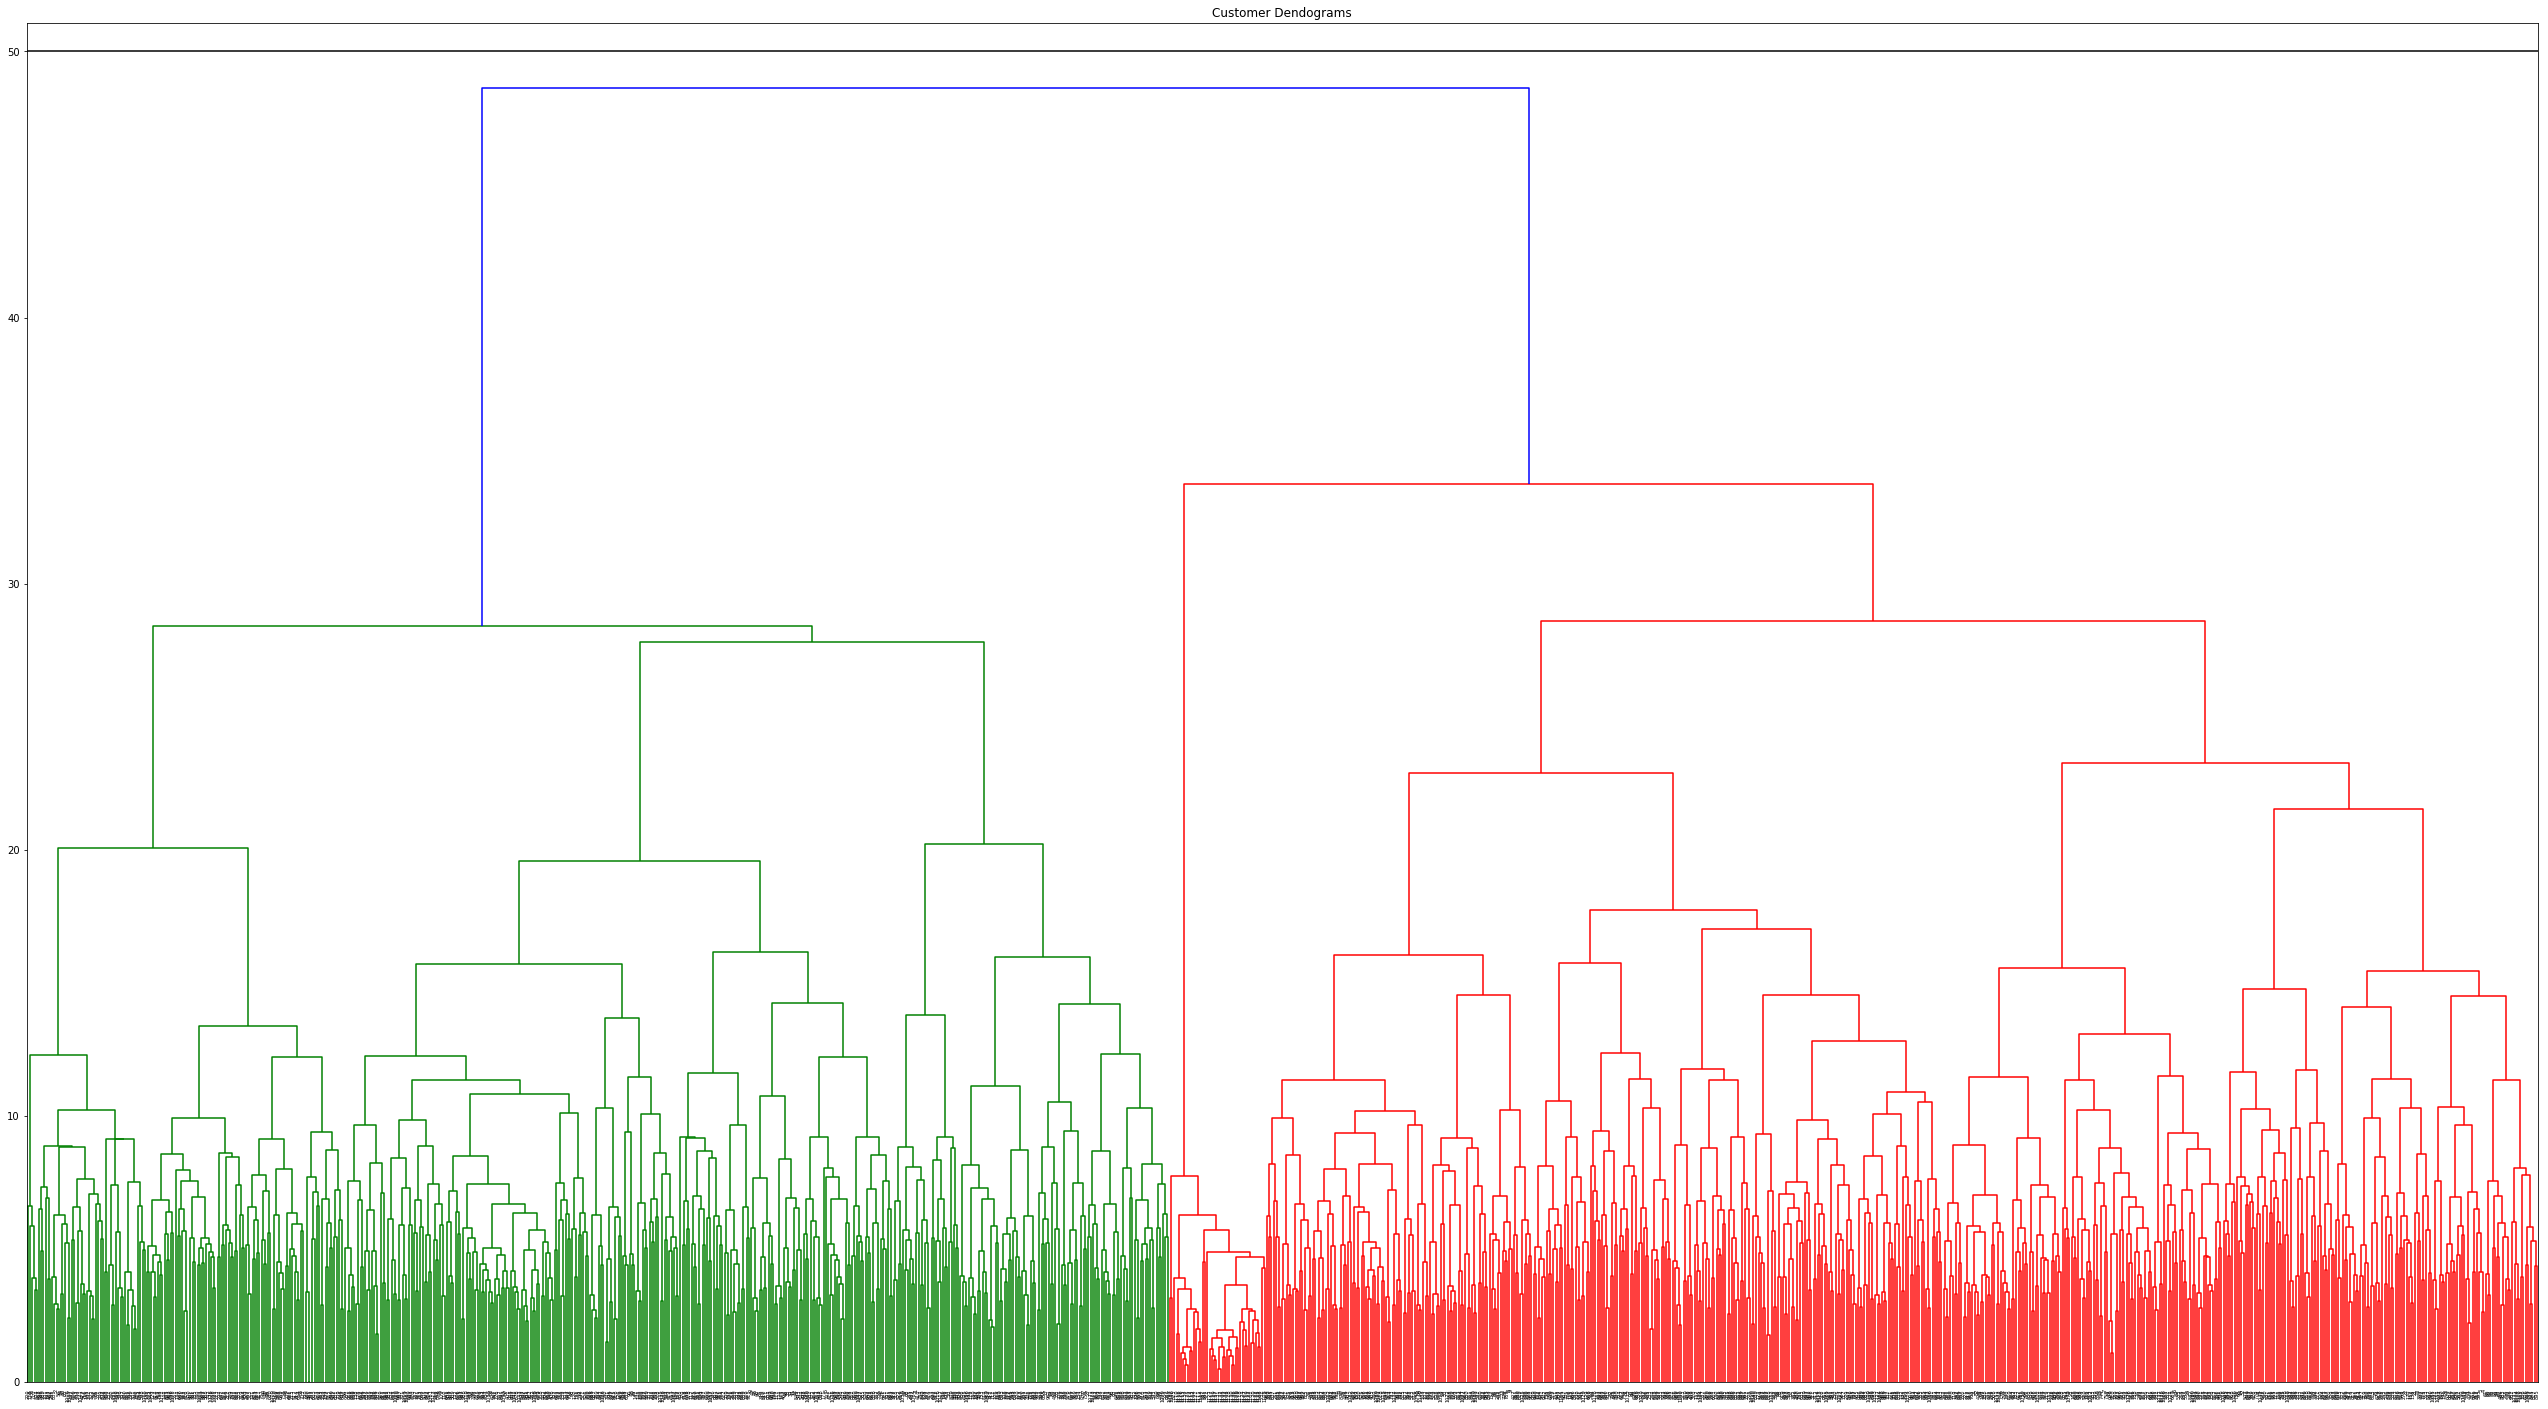

In [14]:
data = X
max_d = 50

plt.figure(figsize=(45, 25))  
plt.title("Customer Dendograms")  
plt.axhline(y=max_d, c='k')
Z = shc.linkage(data, method='ward')
dend = shc.dendrogram(Z)  

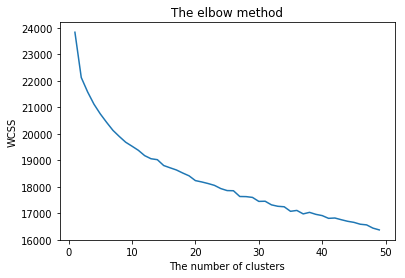

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,50), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

#https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

In [9]:
print(len(X))

1102
